# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

*<br><font color='blue'>Does the Smartcab move at all during the simulation?</font>*

According the visual simulation the smartcab stays idle (not moving). 

*<br><font color='blue'>What kind of rewards is the driving agent receiving?</font>*

The driving agent seems to be receiving positive and negative rewards. 

*<br><font color='blue'>How does the light changing color affect the rewards?</font>*

The agent receives a positive reward if it is properly idle while the traffic light is red.

The agent receives negative rewards (penalty) if it stays idle while the traffic light is green and no oncoming traffic.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*<br><font color='blue'>In the agent.py Python file, choose three flags that can be set and explain how they change the simulation</font>*

**grid_size:** Defines the number intersections in the simulation grid. Basically this represents the size of the spatial component of the environment.

**learning:** If set to True forces the driving agent to use the Q-learning algorithm.

**epsilon:** Sets the continuous value for the exploration factor.

**alpha:** Sets the continuous value for the learning rate.

*<br><font color='blue'>In the environment.py Python file, what Environment class function is called when an agent performs an action?</font>*

The function **act** with header act(self, agent, action) is called to implement an agent's action.

*<br><font color='blue'>In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?</font>*

The function render_text() calls the non-GUI render display of the simulation while render() calls the GUI render display of the simulation.

*<br><font color='blue'>In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?</font>*

It considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


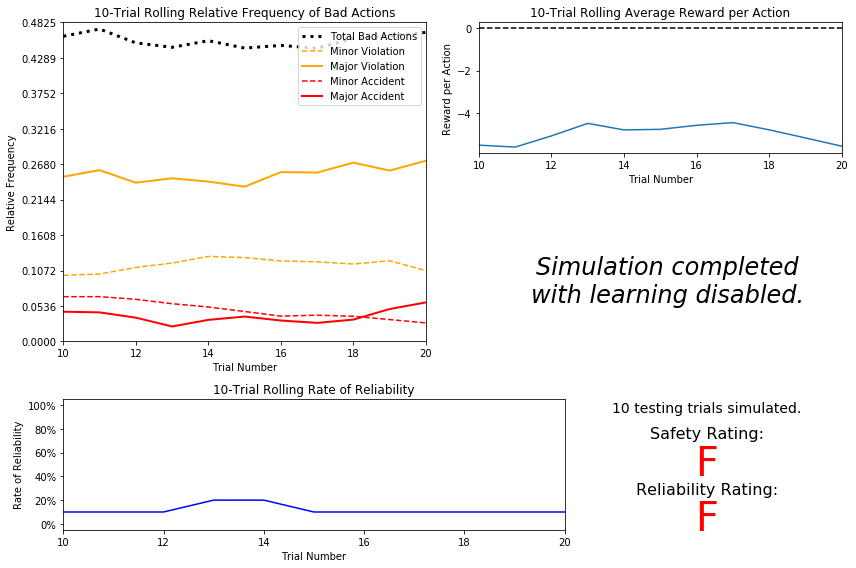

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** 

*<br> <font color='blue'>How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?</font>*

As shown in the visualization panel, the percentage of bad actions taken by the driving agent is varies between ~42% and ~48% during the course of 20 trials. Out of these bad actions, between 4% and 6% cause minor accidents and 4% to 6% cause major accidents; this yields between 8% and 12% of bad actions causing some type of accident.

*<br><font color='blue'>Given that the agent is driving randomly, does the rate of reliability make sense?</font>*

There is a variable rate of reliability that fluctuates between 10% and 20%. This poor performance metric is consistent with a driving agent behaving erratically (i.e. randomly).

*<br><font color='blue'>What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?</font>*

The driving agent is heavily penalized (getting negative rewards) frequently as a result of its erratic behavior.

*<br><font color='blue'>As the number of trials increases, does the outcome of results change significantly?</font>*

Since the agent is not learning anything, but just behaving randomly, the outcome results would not change significantly, but fluctuate perhaps around a (meaningless) average value for a large number of trials.

*<br><font color='blue'>Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?</font>*

Due its erratic behavior and its freqent incursion in traffic violations and accidents, this driving agent is unsafe and unreliable for its passengers. Its overall safety and reliability ratings are both **<font color = 'red'>F</font>**. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

Relevant to safety and efficiency are percepts related to the agent's situational and temporal awareness within the environment.

** *<font color='blue'>Safety:</font>* **

* Traffic light color (inputs['light']) 

All of the agent's movement attempts and traffic violation and potential accident considerations are conditioned upon the traffic light status. So this feature is absolutely neccessary.

* Oncoming traffic percept (inputs['oncoming'])

This feature is also required. It conditions situations that could result in major traffic violations and accidents such as traffic light green and attempting to drive left while oncoming traffic approaches from the right or forwardly towards the agent.

* LH side traffic percept (inputs['left'])
* RH side traffic percept (inputs['right'])

The agent sensors should perceive traffic approaching from its right and/or left while driving forward. If not, for example the agent can cause an accident in cross traffic situations when driving foward with a green light or when attempting to drive left or right in the presence of cross traffic.
 

** *<font color='blue'>Efficiency:</font>* **

* Waypoint (As defined in the route planner module)

This is an important feature the agent should learn in regards to planning a route that could lead to a successful completion of its trip. This reflects an important component of the agent's final policy, and amounts to learn the optimal coordinates in the grid at which the agent should make a turn. 

On average the agent must develop a route between any given coordinates (origin, destination), which varies from simulation to simulation due to stochastic conditions on the environment produced by the status of traffic lights and the presence of other vehicles in the grid. 

* Deadline (As defined in the environment module)

When enforced, the agent gets penalized (effectively and progressively) in terms of the remaining time deducted from the hard-time stamp assigned during initialization. So, if included as a feature, the agent must learn, in addition to learn to drive safely, to take actions based on maximizing the remaining trip time. 

*<br><font color='blue'>If you did not choose some features, why are those features not appropriate?</font>*

In my opinion, the deadline itself is not absolutely required as a training feature to teach an agent to drive with optimal safety and realiability scores, at least not at the level of this simulation. Since this feature impacts considerably the training time and complexity of the siumation, <font color='red'>I have decided not to include it as a state component.</font>


### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

*<br><font color='blue'>If a state is defined using the features you've selected from Question 4, what would be the size of the state space?</font>*

The agent's state I'm considering consist of the following tuple:

* state = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'], inputs['right'])

The environment macrostates are defined by the following state components:

* waypoint: ['forward', 'left', 'right'] (count = 3)
* inputs['light'] : [True, False] (count = 2)
* inputs['oncoming']: [None, 'forward', 'left', 'right'] (count = 4)
* inputs['left']: [None, 'forward', 'left', 'right'] (count = 4)
* inputs['right']:[None, 'forward', 'left', 'right'] (count = 4)

Using the multiplication principle we can compute the total number of states resulting from the different outcomes of the percepts components is **N=3 x 2 x 4 x 4 x 4 = 384**. 

*<br><font color='blue'>Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?</font>*

The number of states considered above, N=384, is fairly small and it can be handled by current available compute infrastructures. The agent won't have issues learning an optimal policy compatible with the constraints set by the rules of the MDP process given in the modules. This is further demonstrated by the results obtained below.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

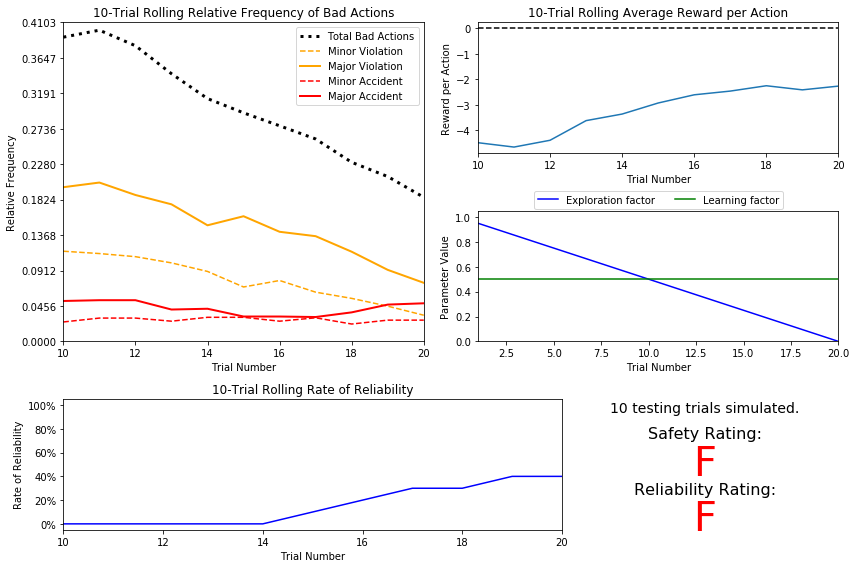

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

*<br><font color='blue'>Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?</font>*

As shown in the plot of "Relative Frequency of Bad Actions vs. Trial Number", the frequency of Total Frequency of Bad Actions is initially comparable to those resulting from the non-learning algorithm.

Notably, the frequency of accidents seems to stay constant and comparable to those resulting from the non-learning algorithm.

*<br><font color='blue'>Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?</font>*

From visual inspection of the plot Parameter vs Trial Number, we can see that $\epsilon$ decays to its threshold value in approximately 19 to 20 trials. This result is consistent with the linear decay function $\epsilon(t) = 1.0 - 0.05 t$; more precisely we need $t=19$ to reach the threshold as $\epsilon(t=19) = 1.0 - 0.05(19) = 0.05$.

*<br><font color='blue'>Is the decaying function you implemented for ϵ (the exploration factor) accurately represented in the parameters panel?</font>*
  
Yes, $\epsilon$ decays linearly from its initial value of 1.0 down to its threshold of 0.05.

*<font color='blue'>As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?</font>*

We can see that the Total Frequency of Bad Actions decreases with the number of trials from an initial ~41% down to ~20%. This decaying trend is also observed in the frequency of Minor and Major Violations. On the other hand, the 10-Trial Rolling Average Reward per Action increases from ~ -4.5 upto ~1.5 during the course of ~20 Trials.

*<font color='blue'>How does the safety and reliability rating compare to the initial driving agent?</font>*

Both ratings correspond to a fail (F) situation similar to the initial driving agent.








-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

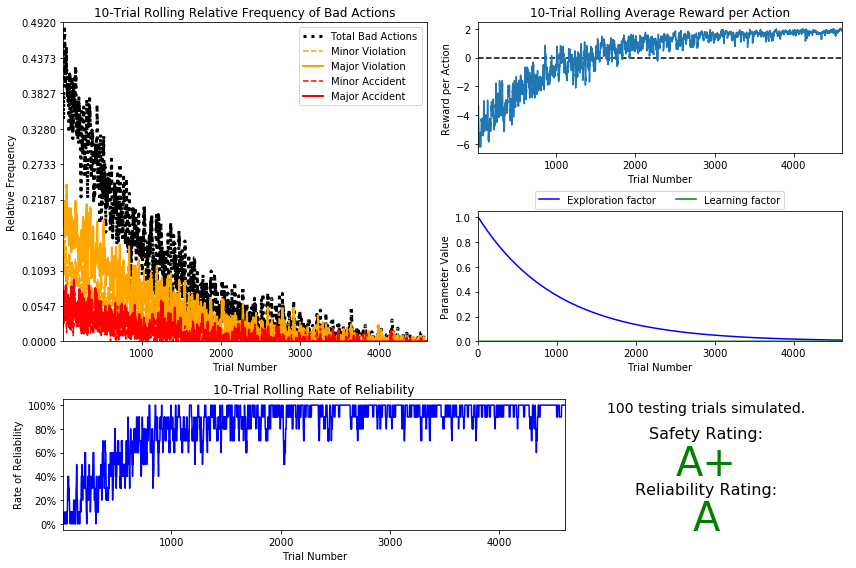

In [3]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

*<br><font color='blue'>What decaying function was used for epsilon (the exploration factor)?</font>*

I used an exponetially decaying exploration factor, $\epsilon(t) = e^{-\alpha t}$,  with a learning rate, $\alpha = 0.001$, representing the decay constant.

*<br><font color='blue'>Approximately how many training trials were needed for your agent before begining testing?</font>*

We can compute explicitly the trial time, $t^{*}$, at which the exploration factor reaches its threshold value, $\epsilon_T = \epsilon(t^{*})$. In the simulation I set the threshold at $\epsilon_T = 0.01$; with this values we set

$t^{*} = -\frac{1}{\alpha}\ln{\epsilon_T} = -\frac{1}{0.001}\ln{0.01} = 4605.17$

Therefore, we need ~4605 training trials prior to start the testing phase; this number is consistent with our visualization results of Parameter Value vs. Trial Number.

*<br><font color='blue'>What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?</font>*

Initially I used a threshold (tolerance) value of 0.001, then I used a larger value, $\epsilon_T = 0.01$; this change did not affect the ratings. 

On the other hand, the learning rate, $\alpha$ , (decay constant) affects considerably the rating values. For example, increasing the learning rate by an order of magnitude from 0.001 to 0.01 results in a failing safety rate and mediocre reliability rates. In the context of Monte Carlo and TD methods, this is the direct result of lowering the number of trials down to 460, which are not enough to appropriately letting the Markov process to thermalize (relax to near-equillibrium), i.e. to reach quasi-stationary action-driven transition rates between most of the possible state tuples that can be formed when the agent visits those states. In the language of MDP and Q-learning this amounts to letting the agent discover and learn from as many previous mistakes as possible, or to let the agent learn enough to aquire the valuable experience it needs to develop an optimal policy.

*<br><font color='blue'>How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?</font>*

The improvement amounts to a "quantum leap" from failing ratings to A+, A ratings on safety and reliability, respectively. The optimized agent commits no traffic violations, and always chooses the correct action. On the other hand, the agent reaches the destination on time for at least 90% of trips. As we did not include the deadline as a state component feature, this latter performance metric could be attributed to not letting the agent learn how to optimize (maximize) the trip-remaining time.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

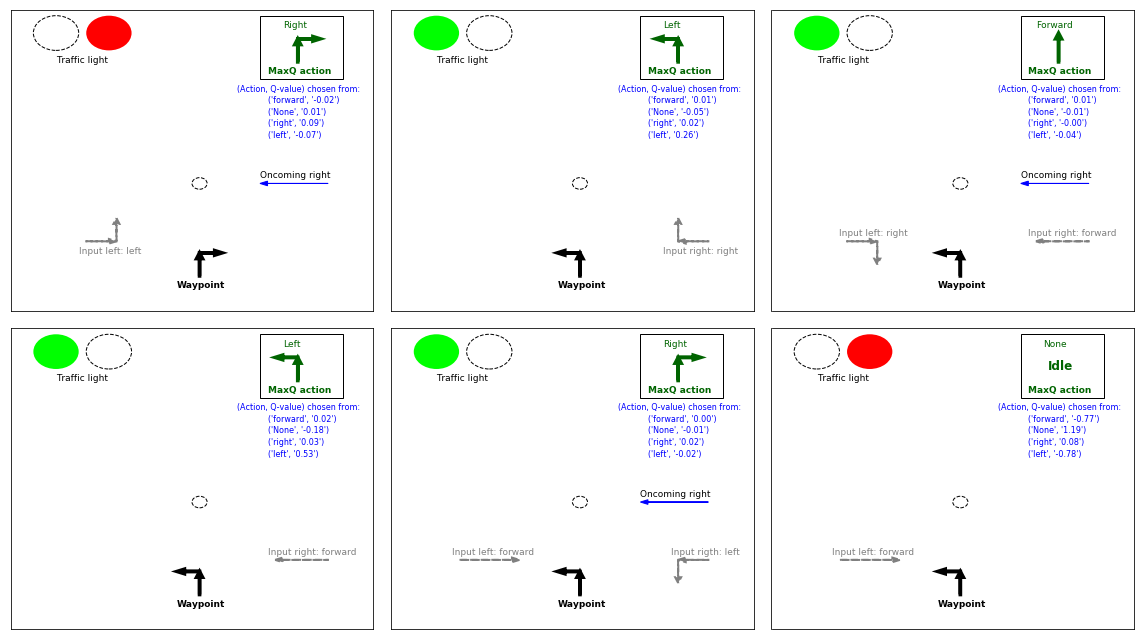

In [31]:
#The following script creates a symbolic representation of the Q-table entries
#represented in the provided text file corresponding to the output of the improved Q-learning
#algorithm
#author: @J.E. Rolon

import operator
import random
import matplotlib.pyplot as plt

# ******************* Extract a random sample from Q-table *******************
def qtable_sample(fname, nsamples):
    """Input filename of textfile storing qtable. Number of samples requested
       Returns a sample of observations from the q-table. Each observation is
       a dictionary specifying the observed state, the input percepts and the
       action that maximizes the Q value.
    """
    f = open(fname, 'r')
    span = len(f.readlines())
    f.seek(0)
    state_maxQ_ldicts = []
    for i in range(span):
        tmp_dict = {}
        str_line = f.readline()
        if "('" in str_line:
            lst1 = []
            lst2 = []
            for i in range(4):
                tmpl = f.readline()
                if '--' in tmpl:
                    pos1 = tmpl.find('--')
                    pos2 = tmpl.find(':')
                    act_def = tmpl[pos1 + 3:pos2 - 1]
                    act_val = tmpl[pos2 + 2:-1]
                    lst1.append(act_def)
                    lst2.append(act_val)
            index, value = max(enumerate(lst2), key=operator.itemgetter(1))
            state = eval(str_line.rstrip())
            wypt = state[0]
            inps = (state[1], state[2], state[3], state[4])
            acts = zip(lst1, lst2)
            maxq_act = lst1[index]
            tmp_dict['waypoint'] = wypt
            tmp_dict['inp_light'] = inps[0]
            tmp_dict['inp_left'] = inps[1]
            tmp_dict['inp_oncoming'] = inps[2]
            tmp_dict['inp_right'] = inps[3]
            tmp_dict['avail_actions'] = acts
            tmp_dict['maxQaction'] = maxq_act
            state_maxQ_ldicts.append(tmp_dict)

    return random.sample(state_maxQ_ldicts, nsamples)

# *************************** Plotting functions **********************************************
#
# The following set of functions encapsulate different objects representing the elements of the
# the Q-table. Together generate a figure representing the state, input percepts and action taken.
def create_canvas(axlabels):
    """Defines the figure frame dimensions and axis specs"""
    plt.plot()
    plt.xlim(-1.2, 1.2)
    plt.ylim(-0.8, 1.8)
    # show axis (off, on)
    plt.axis(axlabels)
    plt.xticks([])
    plt.yticks([])

def intersection_point():
    """Generates a circle specifying the intersection point location"""
    intersect = plt.Circle((0.05, 0.3), radius=0.05, fc='k', fill=False, linestyle='dashed')
    return plt.gca().add_patch(intersect)

def percept_traffic_light(light_color):
    """Creates a representation of the traffic light states. Input current light color"""
    ypos = 1.6
    xpos = -0.9
    dx = 0.35
    if light_color == 'green':
        # green traffic light
        circle = plt.Circle((xpos, ypos), radius=0.15, fc='lime')
        plt.gca().add_patch(circle)
        # red traffic light
        circle2 = plt.Circle((xpos+dx, ypos), radius=0.15, fc='gray', linestyle='dashed', fill=False)
        plt.gca().add_patch(circle2)
        plt.text(xpos, ypos-0.25, 'Traffic light', rotation='horizontal', fontsize='9')
    elif light_color == 'red':
        # green traffic light
        circle = plt.Circle((xpos, ypos), radius=0.15, fc='gray', linestyle='dashed', fill=False)
        plt.gca().add_patch(circle)
        # red traffic light
        circle2 = plt.Circle((xpos+dx, ypos), radius=0.15, fc='r')
        plt.gca().add_patch(circle2)
        plt.text(xpos, ypos - 0.25, 'Traffic light', rotation='horizontal', fontsize='9')
    else:
        raise Exception('Invalid traffic light state')

def percept_input_left(input):
    """Represents the input percept and direction of a potential vehicle approaching from the LEFT
       valid inputs: approaching vehicle turning right, turning left,  moving forward.
       Percepts as observed from agent. Turns represented respect to approaching vehicle.
    """
    if input == 'right':
        # input left
        plt.arrow(-0.7, -0.2, 0.15, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.arrow(-0.5, -0.2, 0.0, -0.15, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(-0.75, -0.15, 'Input left: right', rotation='horizontal', fontsize='9', color='gray')
    elif input == 'left':
        # input right
        plt.arrow(-0.7, -0.2, 0.15, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.arrow(-0.5, -0.2, 0.0, 0.15, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(-0.75, -0.30, 'Input left: left', rotation='horizontal', fontsize='9', color='gray')
    elif input == 'forward':
        # input forward
        plt.arrow(-0.75, -0.2, 0.35, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(-0.8, -0.15, 'Input left: forward', rotation='horizontal', fontsize='9', color='gray')
    elif input == None or 'None':
        pass
    else:
        raise Exception('Invalid percept input')

def percept_input_right(input):
    """Represents the input percept and direction of a potential vehicle approaching from the RIGHT
       valid inputs: approaching vehicle turning right, turning left,  moving forward.
       Percepts as observed from agent. Turns represented respect to approaching vehicle.
    """
    if input == 'left':
        # input left
        plt.arrow(0.9, -0.2, -0.15, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.arrow(0.70, -0.2, 0.0, -0.15, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(0.65, -0.15, 'Input rigth: left', rotation='horizontal', fontsize='9', color='gray')
    elif input == 'right':
        # input right

        plt.arrow(0.9, -0.2, -0.15, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.arrow(0.7, -0.2, 0.0, 0.15, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(0.6, -0.30, 'Input right: right', rotation='horizontal', fontsize='9', color='gray')
    elif input == 'forward':
        # input forward
        plt.arrow(0.9, -0.2, -0.3, 0.0, lw=2, head_width=0.04, head_length=0.05, fc='gray', ec='gray',
                  linestyle='dashed')
        plt.text(0.5, -0.15, 'Input right: forward', rotation='horizontal', fontsize='9', color='gray')
    elif input == None or 'None':
        pass
    else:
        raise Exception('Invalid percept input')

def percept_input_oncoming(direction):
    """Represents the input percept of actual oncoming traffic approaching.
       Valid inputs: oncoming traffic from left, forward or right dirrection.
       Percepts taken from perspective of agent.
    """
    if direction == 'left':
        # oncoming left
        plt.arrow(-0.8, 0.3, 0.4, 0.0, head_width=0.04, head_length=0.05, fc='b', ec='b')
        plt.text(-0.8, 0.35, 'Oncoming left', rotation='horizontal', fontsize='9')
    elif direction == 'forward':
        # oncoming forward
        plt.arrow(0.05, 1.2, 0.0, -0.45, head_width=0.04, head_length=0.05, fc='b', ec='b')
        plt.text(-0.05, 1.45, 'Oncoming forward', rotation='vertical', fontsize='9')
    elif direction == 'right':
        # oncoming right
        plt.arrow(0.9, 0.3, -0.4, 0.0, head_width=0.04, head_length=0.05, fc='b', ec='b')
        plt.text(0.45, 0.35, 'Oncoming right', fontsize='9')
    elif direction == None or 'None':
        pass
    else:
        raise Exception('Invalid oncomming traffic percept')

def waypoint(direction):
    """Represents the current waypoint of agent.
       Valid inputs: waypoint turning left, right or moving forward
       Percept taken from perspective of agent.
    """
    # waypoint foward
    if direction == 'forward':
        plt.arrow(0.05, -0.5, 0.0, 0.3, head_width=0.04, head_length=0.05, fc='k', ec='k', linestyle='solid', linewidth=3.5)
        plt.text(-0.1, -0.6, 'Waypoint', fontsize='9', fontweight='bold')
    # waypoint right
    elif direction == 'right':
        plt.arrow(0.05, -0.5, 0.0, 0.15, head_width=0.04, head_length=0.05, fc='k', ec='k', linestyle='solid', linewidth=3.5)
        plt.arrow(0.05, -0.3, 0.1, 0.0, head_width=0.04, head_length=0.05, fc='k', ec='k', linestyle='solid',
                  linewidth=3.5)
        plt.text(-0.1, -0.6, 'Waypoint', fontsize='9', fontweight='bold')
    elif direction == 'left':
        plt.arrow(0.05, -0.5, 0.0, 0.15, head_width=0.04, head_length=0.05, fc='k', ec='k', linestyle='solid', linewidth=3.5)
        plt.arrow(0.05, -0.3, -0.1, 0.0, head_width=0.04, head_length=0.05, fc='k', ec='k', linestyle='solid',
                  linewidth=3.5)
        plt.text(-0.1, -0.6, 'Waypoint', fontsize='9', fontweight='bold')

    elif direction == None or 'None':
        pass
    else:
        raise Exception('Invalid waypoint percept')

def maxQ_action(action):
    """Writes a message text indicating the action that maximizes Q given the observed percepts"""
    # maxQ action enclosing rectangle
    maxq_rect = plt.Rectangle((0.45, 1.2), 0.55, 0.55, fill=False)
    plt.gca().add_patch(maxq_rect)
    fs = 9
    # maxQ action forward
    if action == 'forward':
        plt.arrow(0.7, 1.35, 0.0, 0.2, head_width=0.04, head_length=0.05, fc='darkgreen', ec='darkgreen', linestyle='solid',
                  linewidth=3.5)
        plt.text(0.5, 1.25, 'MaxQ action', fontsize=fs, fontweight='bold', color='darkgreen')
        plt.text(0.55, 1.65, 'Forward', fontsize=fs, fontweight='normal', color='darkgreen')

    # maxQ action left
    elif action == 'left':
        plt.arrow(0.7, 1.35, 0.0, 0.15, head_width=0.04, head_length=0.05, fc='darkgreen', ec='darkgreen', linestyle='solid',
                  linewidth=3.5)
        plt.arrow(0.7, 1.55, -0.1, 0.0, head_width=0.04, head_length=0.05, fc='darkgreen', ec='darkgreen',
                  linestyle='solid',
                  linewidth=3.5)
        plt.text(0.5, 1.25, 'MaxQ action', fontsize=fs, fontweight='bold', color='darkgreen')
        plt.text(0.6, 1.65, 'Left', fontsize=fs, fontweight='normal', color='darkgreen')

    # maxQ action right
    elif action == 'right':
        plt.arrow(0.7, 1.35, 0.0, 0.15, head_width=0.04, head_length=0.05, fc='darkgreen', ec='darkgreen', linestyle='solid',
                  linewidth=3.5)
        plt.arrow(0.7, 1.55, 0.1, 0.0, head_width=0.04, head_length=0.05, fc='darkgreen', ec='darkgreen',
                  linestyle='solid',
                  linewidth=3.5)
        plt.text(0.5, 1.25, 'MaxQ action', fontsize=fs, fontweight='bold', color='darkgreen')
        plt.text(0.6, 1.65, 'Right', fontsize=fs, fontweight='normal', color='darkgreen')

    # maxQ action None (idle)
    elif action == None or 'None':
        plt.text(0.63, 1.45, 'Idle', fontsize='12', fontweight='bold', color='darkgreen')
        plt.text(0.5, 1.25, 'MaxQ action', fontsize='9', fontweight='bold', color='darkgreen')
        plt.text(0.6, 1.65, 'None', fontsize=fs, fontweight='normal', color='darkgreen')
    else:
        raise Exception('Invalid maxQ action')

#State = (waypoint, inputs['light'], inputs['oncoming'], inputs['left'], inputs['right'])
#{'avail_actions': [('forward', '-0.44'), ('None', '0.19'), ('right', '-0.24'), ('left', '-0.24')],
# 'inp_light': 'red', 'inp_left': 'forward', 'inp_right': None, 'inp_oncoming': 'forward',
# 'waypoint': 'left', 'maxQaction': 'None'}

def legended_description(obs):
    fs = 8
    xpos = 0.4
    ypos = 1.1
    plt.text(xpos-0.1, ypos, '(Action, Q-value) chosen from:', rotation='horizontal', fontsize=fs,color='blue')
    for i, act in enumerate(obs['avail_actions']):
        plt.text(xpos+0.1, (ypos-0.1)-i*0.1, act, rotation='horizontal', fontsize=fs,color='blue')

def act_policy_figure(observation):
    """Generates a figure representation of the Q-table entry or policy observation"""
    create_canvas('on')
    intersection_point()
    waypoint(observation['waypoint'])
    percept_input_oncoming(observation['inp_oncoming'])
    percept_input_left(observation['inp_left'])
    percept_input_right(observation['inp_right'])
    percept_traffic_light(observation['inp_light'])
    maxQ_action(observation['maxQaction'])
    legended_description(observation)

# Generate a set of policy observations extracted from Q-table
sample = qtable_sample('logs/sim_improved-learning.txt', 6)
plt.figure(1, figsize=(16, 9))
nrows = 2
ncols = 3
for fig_num, observation in enumerate(sample):
    plt.subplot(nrows, ncols, fig_num+1)
    act_policy_figure(observation)
    plt.tight_layout()
plt.show()


**Answer:** 

<br><font color='blue'>1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.</font>

The most important part of the (**theoretical**) policy (the one the agent will discover or learn) is the one dictated by the U.S. Traffic and Right-of-Way Rules, that is, every action that the smartcab agent takes must follow these rules. It is assumed that perfect compliance with these rules lead to trips free from traffic violations and accidents. The other component of this policy, are actions taken in order to optimize a smartcab trip chronological deadline when enforced, that is, the agent also learns to take the most efficient path from origin to destination.

The optimal policy that the smartcab **learns or discovers on its own** must approximate as much as possible the theoretical policy, in terms of safety we aim to perfect equivalence to US Righ-of-Way rules that yield A+ rating. Obviously the agent doesn't know about the US Traffic Laws, however the Q-learning algorithm effectively teachs the agent these rules.  

In our specific the optimal policy is illustrated by the entries of the Q-table generated by Q-learning. We need to verify that each of the max-Q actions taken by the cab conform to U.S. Traffic Rules. To this end let us demonstrate this with a ** *random sample* ** from our Q-table:


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.